<a href="https://colab.research.google.com/github/frfarhath/random_forest_regression/blob/main/RF_LAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install Required Libraries
!pip install pandas openpyxl scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Create a shortcut to My Drive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 01_02_2022_13_23_13_6175243.jpg
 11,12,13.gdoc
 1.1.purposal.gdoc
 1234.pdf
'1 (4).png'
'15th Gen Rep.gsheet'
'161098-network-template-16x9 - Bar chart 1.gsheet'
'1653404307006_DBMS project (1).gdoc'
'1653404307006_DBMS project.gdoc'
'1653404307006_DBMS project.pdf'
 1658758001880.gif
 1664715270091.jpg
'1st year 2 Sem. form.gdoc'
'1st year 2 Sem. form.pdf'
'2nd sem Hostal form (1).gdoc'
'2nd sem Hostal form.gdoc'
'2nd sem Hostal form.pdf'
 35.pptx
'4_ Dealing with victims of violence and abuse UoSJ 04th June 2023.gslides'
 5_6082374698518185464.pdf
 ABC.jpg
 ABC.zip
 Abstract.gdoc
'Aesthetic end Exam questions.gdoc'
 Afritha-Farhath.gdoc
 Afritha-Script.gdoc
'Agenda -Virtuosa F.gdoc'
 aidf4-core-javascript-main
 aidf4-core-javascript-main.zip
 Article-Fathima.gdoc
 Article.gdoc
'Assessment 02-UWU_CST_20_035.pdf'
 Assignment05-CST20035.gdoc
 Assignment2-Fathima.gdoc
'assignment DHRM - Copy.gdoc'
'Assignment- UWUCST20035 (1).gdoc'
'Assignment- UWUCST20035.gdo

         Date  Raw_Turbidity  Raw_PH  Raw_Colour  PAC  KMnO4  ACD  Turbidity  \
0  31/12/2019           90.4    7.07       500.0  2.5    0.4  0.5       19.0   
1  31/12/2019           90.4    7.07       500.0  3.0    0.4  0.5       14.2   
2  31/12/2019           90.4    7.07       500.0  3.5    0.4  0.5       12.6   
3  31/12/2019           90.4    7.07       500.0  4.0    0.4  0.5       10.6   
4  31/12/2019           90.4    7.07       500.0  4.5    0.4  0.5       10.7   

     PH  Colour  
0  7.07    48.0  
1  7.05    39.0  
2  7.02    31.0  
3  6.98    27.0  
4  6.93    29.0  


<Axes: >

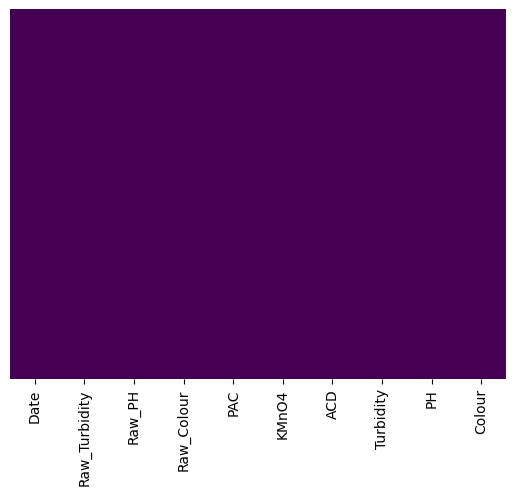

In [5]:
# Load the dataset
data = pd.read_csv('/mydrive/JARTEST.csv')
print(data.head())

# Check for missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
# Drop the 'date' column if it exists
data = data.drop(columns=['date'], errors='ignore')

In [7]:
# Define features and targets
features = ['Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD']
targets = ['Turbidity', 'PH', 'Colour']

X = data[features]
y = data[targets]

In [10]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [12]:
# Predictions
y_test_pred = best_model.predict(X_test)
y_val_pred = best_model.predict(X_val)

In [13]:
# Evaluation
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Testing MAE: {test_mae:.2f}, R²: {test_r2:.2f}")
print(f"Validation MAE: {val_mae:.2f}, R²: {val_r2:.2f}")

Testing MAE: 6.09, R²: 0.72
Validation MAE: 5.76, R²: 0.74


In [14]:
# Evaluate model accuracy per target
def evaluate_accuracy(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Accuracy per Target:")
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i]) * 100
        print(f"{target}: MAE = {mae:.2f}, R² = {r2:.2f}%")


In [15]:
# Evaluate on Testing and Validation sets
evaluate_accuracy(y_test, y_test_pred, "Testing")
evaluate_accuracy(y_val, y_val_pred, "Validation")


Testing Accuracy per Target:
Turbidity: MAE = 4.11, R² = 65.20%
PH: MAE = 0.07, R² = 84.86%
Colour: MAE = 14.08, R² = 66.23%

Validation Accuracy per Target:
Turbidity: MAE = 4.06, R² = 67.06%
PH: MAE = 0.06, R² = 86.37%
Colour: MAE = 13.16, R² = 69.29%


In [16]:
# Calculate overall accuracy
def calculate_overall_accuracy(y_true, y_pred):
    r2_scores = [r2_score(y_true.iloc[:, i], y_pred[:, i]) for i in range(len(targets))]
    overall_r2 = sum(r2_scores) / len(r2_scores) * 100
    return overall_r2

overall_test_accuracy = calculate_overall_accuracy(y_test, y_test_pred)
overall_val_accuracy = calculate_overall_accuracy(y_val, y_val_pred)

print(f"\nOverall Testing Accuracy: {overall_test_accuracy:.2f}%")
print(f"Overall Validation Accuracy: {overall_val_accuracy:.2f}%")


Overall Testing Accuracy: 72.10%
Overall Validation Accuracy: 74.24%


In [17]:
# Sample Prediction
sample_input = pd.DataFrame({
    'Raw_Turbidity': [90.4, 90.4, 90.4, 90.4, 90.4, 90.4],
    'Raw_PH': [7.07, 7.07, 7.07, 7.07, 7.07, 7.07],
    'Raw_Colour': [500, 500, 500, 500, 500, 500],
    'PAC': [2.5, 3.0, 3.5, 4.0, 4.5, 5],
    'KMnO4': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
    'ACD': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
})

sample_prediction = best_model.predict(sample_input)
sample_results = pd.DataFrame(sample_prediction, columns=targets)

print("\nSample Predictions:")
print(sample_results)


Sample Predictions:
   Turbidity        PH     Colour
0  20.653367  7.050233  52.617333
1  16.900667  7.038900  41.853333
2  14.829633  7.006500  33.003333
3  12.539733  6.979167  29.356667
4  11.903933  6.945467  29.670000
5  13.250000  6.924300  32.280000


In [23]:
# Function to calculate overall accuracy (R² average)
def calculate_overall_accuracy(y_true, y_pred):
    r2_scores = [
        r2_score(y_true.iloc[:, i], y_pred.iloc[:, i])
        for i in range(len(targets))
    ]
    overall_r2 = sum(r2_scores) / len(r2_scores) * 100  # Convert to percentage
    return overall_r2

# Function to evaluate sample predictions
def evaluate_sample_predictions(y_true, y_pred):
    # Convert y_pred to a pandas DataFrame if it's not already
    y_pred_df = pd.DataFrame(y_pred, columns=targets)

    print("\nSample Prediction Accuracy per Target:")
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred_df.iloc[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred_df.iloc[:, i]) * 100  # R² in percentage
        accuracy = 100 - mae  # Approximation for prediction accuracy
        print(f"{target}:")
        print(f"  MAE: {mae:.2f}")
        print(f"  R² (Percentage Accuracy): {r2:.2f}%")
        print(f"  Approximate Prediction Accuracy: {accuracy:.2f}%")

    # Calculate overall R² and overall accuracy
    overall_r2 = calculate_overall_accuracy(y_true, y_pred_df)
    print(f"\nOverall R² (Percentage Accuracy): {overall_r2:.2f}%")

    overall_mae = sum(
        mean_absolute_error(y_true.iloc[:, i], y_pred_df.iloc[:, i])
        for i in range(len(targets))
    ) / len(targets)
    print(f"Overall MAE: {overall_mae:.2f}")
    overall_accuracy = 100 - overall_mae
    print(f"Overall Approximate Accuracy: {overall_accuracy:.2f}%")

# Expected Values (Ground Truth)
expected_values = pd.DataFrame({
    'Turbidity': [19, 14.2, 12.6, 10.6, 10.7, 13.6],
    'PH': [7.07, 7.05, 7.02, 6.98, 6.93, 6.90],
    'Colour': [48, 39, 31, 27, 29, 34]
})

# Predicted Values (Sample Results)
sample_results = pd.DataFrame({
    'Turbidity': [20.653367, 16.900667, 14.829633, 12.539733, 11.903933, 13.250000],
    'PH': [7.050233, 7.038900, 7.006500, 6.979167, 6.945467, 6.924300],
    'Colour': [52.617333, 41.853333, 33.003333, 29.356667, 29.670000, 32.280000]
})

# Evaluate the sample predictions
evaluate_sample_predictions(expected_values, sample_results)



Sample Prediction Accuracy per Target:
Turbidity:
  MAE: 1.68
  R² (Percentage Accuracy): 57.46%
  Approximate Prediction Accuracy: 98.32%
PH:
  MAE: 0.01
  R² (Percentage Accuracy): 93.27%
  Approximate Prediction Accuracy: 99.99%
Colour:
  MAE: 2.37
  R² (Percentage Accuracy): 85.92%
  Approximate Prediction Accuracy: 97.63%

Overall R² (Percentage Accuracy): 78.88%
Overall MAE: 1.35
Overall Approximate Accuracy: 98.65%
